In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Reconstruct results of Data Exploration Notebook
data = pd.read_csv("/content/drive/MyDrive/Learning/Data Science/IBM Advanced DS Certification/train.txt", delimiter= " ", header = None)
data = data.iloc[:, 0:26]
colNames = ["UnitNumber", "TimeCycle", "OpSetting1", "OpSetting2", "OpSetting3"]
sensorCols = ["SensorMeasurement_" + str(x) for x in range(1, 22)]
colNames.extend(sensorCols)
data.columns = colNames

#View Data Frame Header
data.head()

,UnitNumber,TimeCycle,OpSetting1,OpSetting2,OpSetting3,SensorMeasurement_1,SensorMeasurement_2,SensorMeasurement_3,SensorMeasurement_4,SensorMeasurement_5,...,SensorMeasurement_12,SensorMeasurement_13,SensorMeasurement_14,SensorMeasurement_15,SensorMeasurement_16,SensorMeasurement_17,SensorMeasurement_18,SensorMeasurement_19,SensorMeasurement_20,SensorMeasurement_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


Now that the data is read in, we'll need to determine the number of `timeCycles` that each engine lasted. This will be our objective. We'll create a data frame to store the useful lifetimes for each engine. After computing `UnitLife` for each engine, we'll plot the distribution along with mean and median `UnitLife`.

In [2]:
usefulLife_df = pd.DataFrame(data["UnitNumber"].value_counts())
usefulLife_df.columns = ["UnitLife"]
usefulLife_df["UnitNumber"] = usefulLife_df.index
usefulLife_df = usefulLife_df.sort_values("UnitNumber")
usefulLife_df = usefulLife_df[["UnitNumber", "UnitLife"]].reset_index(drop = True)
usefulLife_df.head()

,UnitNumber,UnitLife
0,1,223
1,2,164
2,3,150
3,4,159
4,5,357


Median Useful Life:  209.5
Mean Useful Life:  210.63302752293578


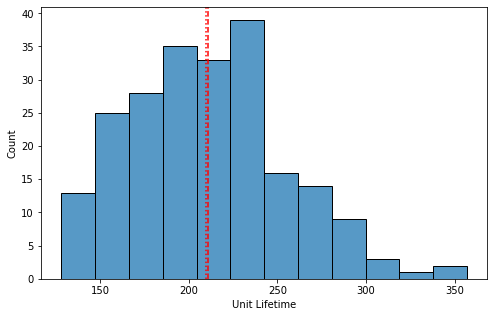

In [3]:
plt.figure(figsize = (8, 5))
sns.histplot(usefulLife_df["UnitLife"])
plt.axvline(usefulLife_df["UnitLife"].mean(), linestyle = "dashed", color = "red")
plt.axvline(usefulLife_df["UnitLife"].median(), linestyle = "dotted", color = "red")
plt.xlabel("Unit Lifetime")
plt.ylabel("Count")

print("Median Useful Life: ", usefulLife_df["UnitLife"].median())
print("Mean Useful Life: ", usefulLife_df["UnitLife"].mean())

We see that the `UnitLife` is slightly right-skewed, with mean and median both at approximately 210 `timeCycles`. As a reminder, it is more expensive to overestimate Remaining Useful Life than it is to underestimate it.

Now we join the `UnitLife` variable onto the original dataset. We will use `UnitLife` and the current `timeCycle` to compute the Remaining Useful Life (`RUL`) variable, which will be our objective.

In [4]:
#We'll join the `UnitLife` variable onto the original dataset
data = data.merge(usefulLife_df, how = "left", on = "UnitNumber")
data["RUL"] = data["TimeCycle"] - data["UnitLife"]
data.head()

,UnitNumber,TimeCycle,OpSetting1,OpSetting2,OpSetting3,SensorMeasurement_1,SensorMeasurement_2,SensorMeasurement_3,SensorMeasurement_4,SensorMeasurement_5,...,SensorMeasurement_14,SensorMeasurement_15,SensorMeasurement_16,SensorMeasurement_17,SensorMeasurement_18,SensorMeasurement_19,SensorMeasurement_20,SensorMeasurement_21,UnitLife,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,223,-222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,223,-221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,223,-220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,223,-219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,223,-218


At this point we are ready for Exploratory Data Analysis (EDA) and Feature Engineering. See you in the `EDAandFE` notebook.